# Data Story
When it comes to plots regarding NFL games, there are a few important things to keep in mind. First off, while plenty of statistics have a strong impact on winning, I wanted to focus on certain trends and special impacts. Things like Total Points and Total Yards will always help your chances overall but that is too obvious. While there are many plots to discuss, I focused on the ones that caught my eye the most.
<br>

Also, as most of the Bar Plots will show, the Road and Home teams tend to start at different points when it comes to winning percentage. Road teams will usually start at lower percentages while Home teams start at higher percentages. This means the significance of a statistic impacting the two separate teams is focused on how much it increases their chances from the starting point to the end point. Many of the aspects that explain why Road teams start low are hard to quantify (traveling, unfamiliar hotels, lower quality locker rooms, etc.) but know that this is expected.
<br>

Finally, remember that these Bar Plots show the mean or calculated average so not every situation will end in the same result. With all of that out of the way, it is time to focus on plots that stood out to me for how they impacted a team's chances of winning.

In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("poster")
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [2]:
# Uploading DataFrame and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/NFL Capstone Project/Data Wrangling/nfl_df.csv', delimiter='\t', index_col=0)
df.head()

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
0,"on December 20, 2015",1,19,2,0,0,2,2,0,0,...,2248,5,506,3,0,0,True,1,nfl-2015-2016,15
1,"on November 29, 2015",2,17,2,1,0,2,1,0,0,...,2247,2,350,1,0,0,True,1,nfl-2015-2016,12
2,"on December 27, 2015",1,19,0,0,2,2,1,3,3,...,1784,1,265,0,1,1,False,0,nfl-2015-2016,16
3,"on November 22, 2015",2,21,0,0,0,2,0,1,1,...,1875,4,415,3,0,0,False,0,nfl-2015-2016,11
4,"on January 3, 2016",1,16,1,0,0,0,0,0,0,...,2197,4,382,7,0,0,True,1,nfl-2015-2016,17


## Plot 1
Although the NFL has become known as a passing league, many still say you need to run the ball to be a true title contender and win the Super Bowl. The question then is how much should you run the football? Many think about rushing yards as the true statistic and while there is an upward trend for winning and rushing yards, I am not sure that is the real key. Instead just attempting to run the ball is more important especially for away teams.

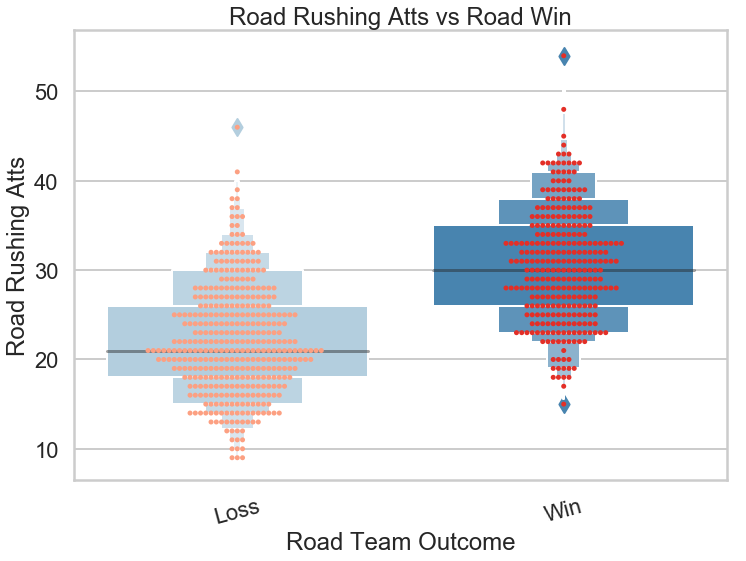

In [3]:
# Shows the Rushing Attempts the Road team accumulated compared to Road teams winning
_ = sns.boxenplot(y='Road Rushing Atts', x='Road Win', data=df, palette='Blues')
_ = sns.swarmplot(y='Road Rushing Atts', x='Road Win', data=df, palette='Reds')
_ = plt.xticks([False, True], ['Loss', 'Win'], rotation=15)
_ = plt.xlabel('Road Team Outcome')
_ = plt.title('Road Rushing Atts vs Road Win')
_ = plt.savefig('Road Rushing Atts vs Road Win.png')

** When looking at the above plot, we can see the median is almost 10 attempts different between winning and losing. There may be outliers for losing away teams who run the ball a lot but overall there is a significant increase for winning teams. The amount of attempts to run the ball has a very strong impact on the away team's ability to win. If the Road team runs it over 30 times, they have a very good chance of winning.**

## Plot 2
As we saw in the previous plot, it is clear running the football is key. But it is more than just about scoring. In fact, some of the biggest reasons teams focus on rushing include wearing down the defense as well as controlling field position. Another important reason for rushing the ball is increasing your time of possession.

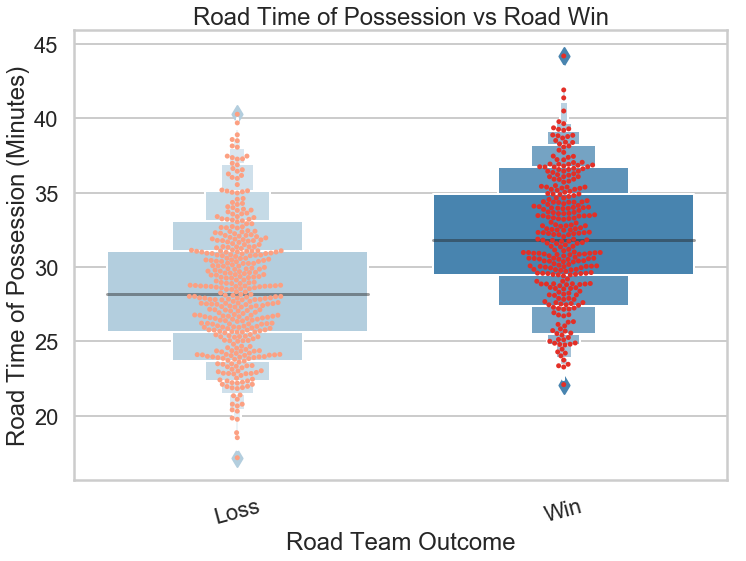

In [4]:
# Shows the Time of Possession the Road team accumulated compared to Road teams winning

# Converting Time of Possession from seconds into minutes
top_min = df['Road Time of Possession'] / 60
_ = sns.boxenplot(y=top_min, x=df['Road Win'], palette='Blues')
_ = sns.swarmplot(y=top_min, x=df['Road Win'], palette='Reds')
_ = plt.xticks([False, True], ['Loss', 'Win'], rotation=15)
_ = plt.xlabel('Road Team Outcome')
_ = plt.ylabel('Road Time of Possession (Minutes)')
_ = plt.title('Road Time of Possession vs Road Win')
_ = plt.savefig('Road Time of Possession vs Road Win.png')

** For Road teams we see another big increase in the medians for time of possession. In losing efforts, the median is around 28 minutes while for winning efforts we see a median closer to about 32 minutes. Although the difference between the two times may not seem too drastic, in such a fast-paced sport every second is crucial plus, with a normal game taking 60 minutes to complete (unless they go to overtime), controlling the ball for over half of the game is huge. Clearly, away teams gain a noticeable advantage when they can control the clock.**

## Plot 3
While I have focused a lot on Road teams running the football, that does not mean they should not pass the ball. Most of the top offenses have a good variety of running and passing plays that keep the defense honest. But is there a smart situation where a team should pass? For away teams, passing for First Downs is immensely helpful.

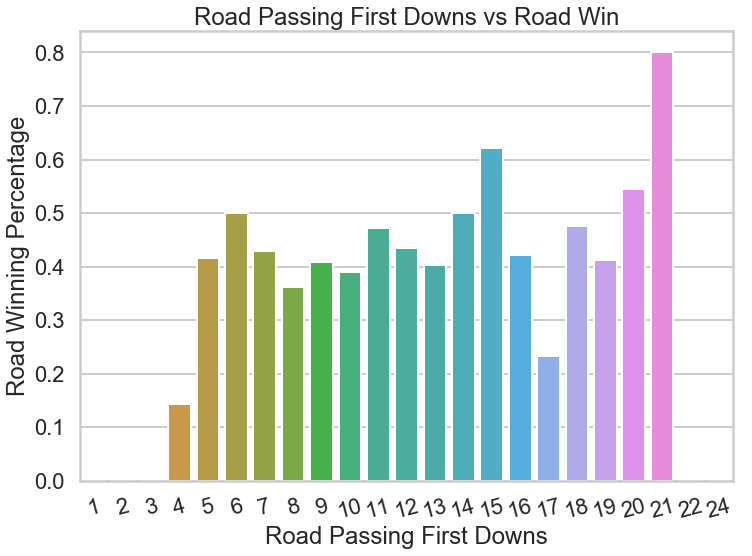

In [5]:
# Shows the Passing First Downs the Road team accumulated compared to Road teams winning
df_RPFD_RW = df.groupby('Road Passing First Downs')['Road Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Passing First Downs', y='Road Win', data=df_RPFD_RW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Road Winning Percentage')
_ = plt.title('Road Passing First Downs vs Road Win')
_ = plt.savefig('Road Passing First Downs vs Road Win.png')

** Starting off at low percentages for a low amount of passing First Downs, we notice an upward trend as the Road team passes for more of them. The middle area is consistently around 40 to 50 percent but that is a huge increase especially with how hard it is to win on the road. When you start getting close to 20 passing First Downs, the chances of winning increase dramatically before some surprising dips. While the late drops are likely outliers, we can see, along with the two prior plots, that away teams really do better when they control the football. Passing for First Downs keeps drives going and limits the amount of times the Home team gets the ball. If more Road teams consistently took their time driving down the field, this plot could have even more of an upward trend.**

## Plot 4
After a lot of talk about the Road teams, it is time to look at what helps Home teams win. While their chances of winning are already higher just by playing at home, there are certain trends that catch the eye. The previous plots focused on Road teams controlling the ball so what do Home teams do in response? As the upcoming plot will show, there is a reason Road teams should focus on running the football.

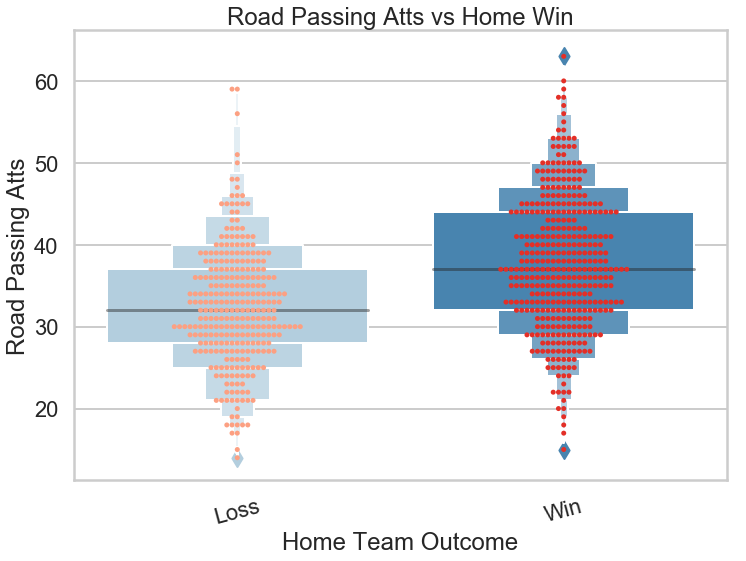

In [6]:
# Shows the Passing Attempts the Road team accumulated compared to Home teams winning
_ = sns.boxenplot(y='Road Passing Atts', x='Home Win', data=df, palette='Blues')
_ = sns.swarmplot(y='Road Passing Atts', x='Home Win', data=df, palette='Reds')
_ = plt.xticks([False, True], ['Loss', 'Win'], rotation=15)
_ = plt.xlabel('Home Team Outcome')
_ = plt.title('Road Passing Atts vs Home Win')
_ = plt.savefig('Road Passing Atts vs Home Win.png')

** As a Road team passes the football more, the Home team's chances actually increase with a median that is higher in winning situations. There may be outliers where the Home team actually lost when the away team attempted a lot of passes but, overall, we see a definite advantage for the Home team in these situations. This further strengthens why Road teams need to control the football as well as why the team at home may want more of a high scoring game. If they make the away team pass it more because they are behind, the Home team has a better chance of winning.**

## Plot 5
Looking at defenses, we already know basic stats like points and yards are things you do not want to give up. Yet defenses still have a hard time in the NFL today because of how the rules make it easier for the offense. So teams need to know what is important to focus on when coming up with defensive schemes. One aspect that stands out, especially for Home teams, is getting to the opposing team's quarterback.

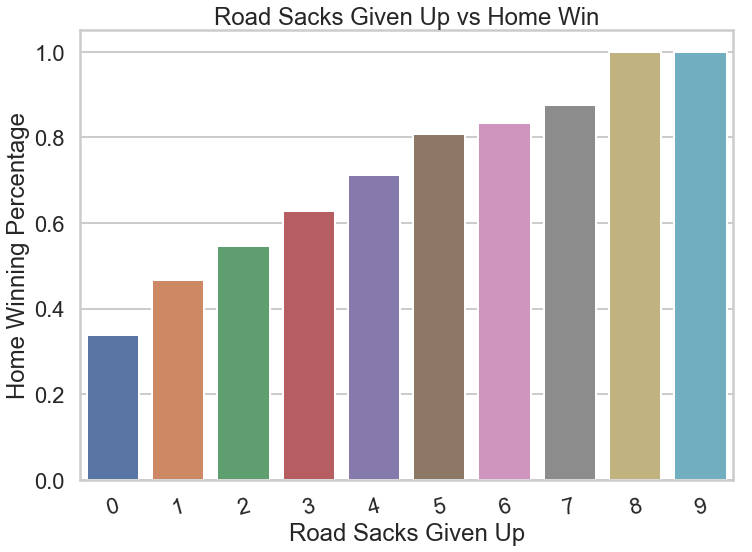

In [7]:
# Shows the Sacks the Road team gave up, meaning the Home team accumulated, compared to Home teams winning
df_RSGU_HW = df.groupby('Road Sacks Given Up')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Sacks Given Up', y='Home Win', data=df_RSGU_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Road Sacks Given Up vs Home Win')
_ = plt.savefig('Road Sacks Given Up vs Home Win.png')

** As we can see if the Home team does not get a single sack, their chances of winning are around 35%. But with each sack they obtain, there is a significant bump in their chances of winning. For the low numbers, we see about a 10% increase each time before it lessens a bit in extreme situations. And although a win percentage of 100% for 8 and 9 sacks may seem odd to some, that would make sense in extreme outliers like those because of their rarity. What is important when it comes to sacks is that Home teams see a consistent upward trend for each sack they record making rushing and getting to the quarterback an important key for their defensive schemes.**

## Plot 6
But what happens if you do not get to the quarterback? We saw previously that the more a team attempts to pass the ball, the lesser their chances are of winning. While part of that may be from sacks, another aspect is turning the ball over. Turnovers are always an important factor in an NFL game and, as expected, the more you turn it over, the more likely you are to lose. But if you are at home and you can turn the other team over, what is the best thing to do with the change in possession? The answer: score immediately.

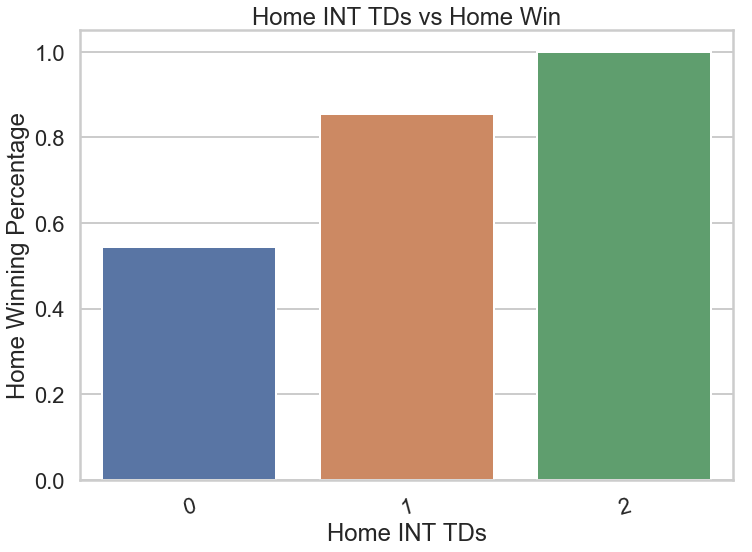

In [8]:
# Shows the Interceptions returned for Touchdowns the Home team accumulated compared to Home teams winning
df_HITD_HW = df.groupby('Home INT TDs')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Home INT TDs', y='Home Win', data=df_HITD_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Home INT TDs vs Home Win')
_ = plt.savefig('Home INT TDs vs Home Win.png')

** Some may think it is obvious that scoring a touchdown when returning an interception is going to help your team. But I do not think many realize just how beneficial it is. When a Home team returns just 1 interception for a touchdown, their chances of winning increase by around 30%. To have one play increase your chances of winning by that much is stunning. And although 2 of these plays seem to guarantee a victory, those are rare situations and it would make sense that a Home team would win in those cases. What is important to notice is how just one poor play by the Road team can drastically increase the Home team's chance of winning.**

## Plot 7
Now that I have talked a lot about the defensive successes for Home teams, it is time to look at an interesting statistic for their offenses. Like I mentioned plenty of times, obvious stats are always going to see better chances of winning (even for away teams) so it is important to look at the more overlooked statistics. There are plenty of ways to score in a game as well as a variety in types of scoring situations. Big plays will always get attention but there is something to be said about finishing when close to the goal line. And for Home teams, the more they succeed in these situations the better their chances of winning become.

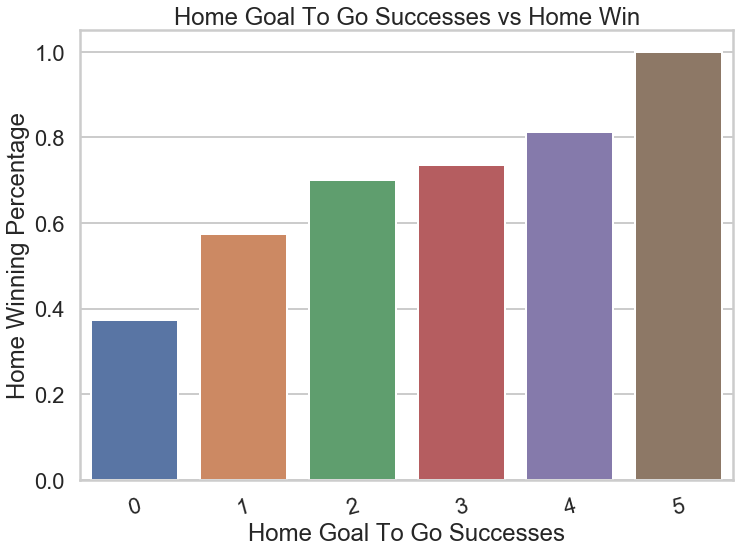

In [9]:
# Shows the Goal To Go Successes the Home team accumulated compared to Home teams winning
df_HGTGS_HW = df.groupby('Home Goal To Go Successes')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Home Goal To Go Successes', y='Home Win', data=df_HGTGS_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Home Goal To Go Successes vs Home Win')
_ = plt.savefig('Home Goal To Go Successes vs Home Win.png')

** In case the vernacular is confusing, a Goal To Go success is when a team has a down where the line to gain is the end zone (like First and Goal, Second and Goal, etc.) and they score. With Home teams there is a big increase just from 0 to 1 successes as a team's win percentage increases from less than 40% to closer to 60%. And after that, it just keeps rising. This is important for away teams to keep in mind as well because when their defense is in this situation, they need to keep the Home team out of the end zone. Otherwise, it is just a consistent upward trend for each success for the Home team.**

## Plot 8
Finally, to put it all together, it is important to look at how offenses and defenses can be used together to better a team's winning percentage. While the above stats can definitely see aspects of both sides, there was one stat that perfectly encapsulated this collaboration. When teams get to Fourth Down, they have their choices of either going for it, punting it or kicking a Field Goal. Each is used for different situations usually focused on field location and score. But many think being aggressive and going for Fourth Down is the way to go even though failure results in turning the ball over. Yet when going through the data, teams succeeding in Fourth Down is not beneficial especially for teams on the road.

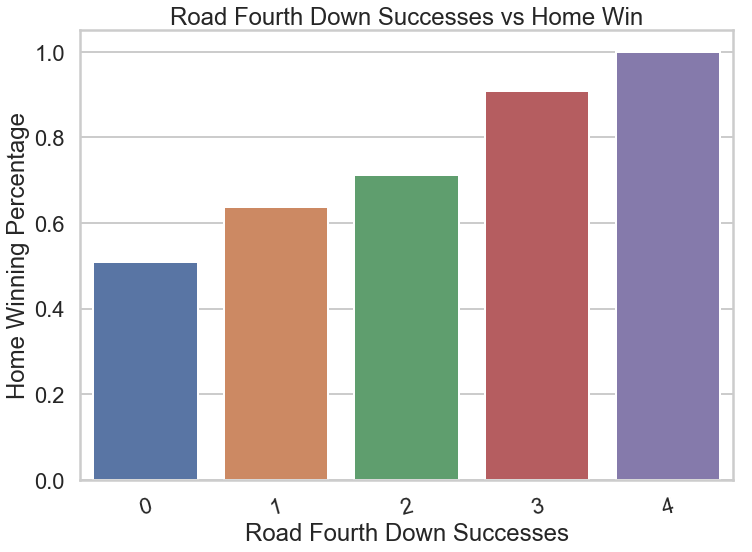

In [10]:
# Shows the Fourth Down Successes the Road team accumulated compared to Home teams winning
df_RFDS_HW = df.groupby('Road Fourth Down Successes')['Home Win'].mean().to_frame().reset_index()
_ = sns.barplot(x='Road Fourth Down Successes', y='Home Win', data=df_RFDS_HW)
_ = plt.xticks(rotation=15)
_ = plt.ylabel('Home Winning Percentage')
_ = plt.title('Road Fourth Down Successes vs Home Win')
_ = plt.savefig('Road Fourth Down Successes vs Home Win.png')

** For each Fourth Down success that Road team accumulates, the better the Home team's chances of winning. That means each time the away team either keeps the drive alive or scores in these situations, their opponent is more likely to win. This statistic is very much impacted by both sides of the ball because for the defense it means they are forcing the opposing team to Fourth Downs while, since the Road team is going for it, the offense for the Home team has likely gained a lead which is why their opponent feels the need to take this chance. While many fans like aggressive play calling, in Fourth Down situations the aggressiveness tends to hurt teams especially for those on the road.**

# Conclusion
If there is something to learn from these specific plots it is a general strategy of how both Road and Home teams should play in an NFL game. Road teams would be best to focus on controlling the ball by running the football, passing when needed and keeping the ball out of their opponent's hands. Home teams, on the other side, likely prefer high scoring affairs where they can force the away team into passing situations. That way they can get after the quarterback, force turnovers as well as make their opponent go for Fourth Down while they take advantage of their own key scoring plays. 
<br>

Now keep in mind, just because I may have focused on one team's chances of winning in certain plots, it does not mean that the other does not see their chances of winning increase in the same situations. In fact there were similar plots for each team in plenty of situations including statistics that were not utilized here. What I focused on were the ones that seemed most profound and had the biggest impact as well as most exponential increase in winning over time. And as mentioned in the beginning, many of these plots show the averages so the expected result may not happen every time but these are statistics that I want to dive into more to find deeper meaning into how much of an impact they truly have on winning.